<a href="https://colab.research.google.com/github/mukul-mschauhan/deep-learning/blob/main/Classification_using_NN_%26_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Lets create the dataset for the classification

# Since we will be using Neural Net model, lets create a non-linear dataset
import numpy as np
from sklearn.datasets import make_circles

# Make 1000 samples

X, y = make_circles(n_samples=1000, noise = 0.03, random_state = 7)

print(f'Print - Len of X is {len(X)} & Y is {len(y)} followed by Type: {type(X)}')

Print - Len of X is 1000 & Y is 1000 followed by Type: <class 'numpy.ndarray'>


In [30]:
# Print First 5 Samples
print(f'First 5 Samples: {X[:5]}, {y[:5]}')

First 5 Samples: [[-0.75681927 -0.27401115]
 [-0.48167671 -0.87409407]
 [-0.97024009 -0.25205207]
 [-0.66094436 -0.49907384]
 [-0.90793058  0.40841756]], [1 0 0 1 0]


In [31]:
# Convert the Data into DataFrame
import pandas as pd
circles = pd.DataFrame({"X1":X[:, 0], "X2":X[:, 1], "label":y})
circles.head()

,X1,X2,label
0,-0.756819,-0.274011,1
1,-0.481677,-0.874094,0
2,-0.970240,-0.252052,0
3,-0.660944,-0.499074,1
4,-0.907931,0.408418,0


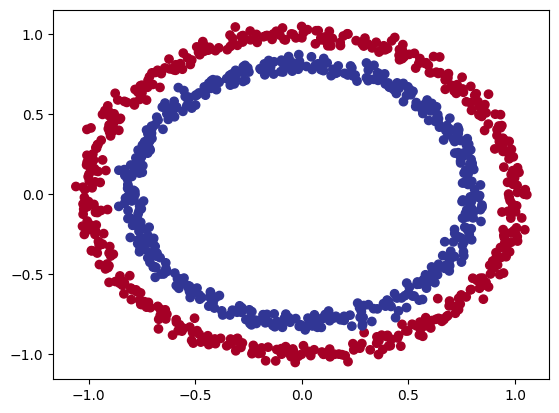

In [32]:
import matplotlib.pyplot as plt

plt.scatter(x = X[:, 0], y = X[:, 1], c = y, cmap = plt.cm.RdYlBu)
plt.show()

## Convert the Datasets into Tensors and create Train Test Split

### Why Tensors?

* **GPU Acceleration:** Neural networks heavily rely on matrix operations. Tensors are specifically designed to efficiently leverage the parallel processing capabilities of GPUs, making computations significantly faster. NumPy arrays or Pandas Dataframes might not offer this optimized GPU utilization.

* **Framework Compatibility:** Deep learning frameworks like TensorFlow and PyTorch are built around Tensors. These frameworks provide a wealth of tools, pre-built layers, optimization algorithms, and automatic differentiation capabilities that are seamlessly integrated with Tensor operations.

* **Automatic Differentiation:** A core component of neural network training is backpropagation, which relies on calculating gradients. Deep learning frameworks automatically handle gradient computations for Tensors, making the training process much simpler.

#### Can't I use NumPy or Pandas directly?

* Technically: While you might be able to construct very basic neural network models using only NumPy, it would be significantly more complex and less efficient. You'd have to manually implement many low-level operations and optimizations that are readily available in deep learning frameworks.

* Practicality: For any real-world application, directly using NumPy or Pandas is not recommended. The benefits of Tensors and deep learning frameworks in terms of performance, ease of use, and access to advanced features far outweigh the minor inconvenience of converting your data.

#### Does it really matter?

* For small datasets or simple models: The difference might not be very noticeable.

* For large datasets or complex models: The performance gains from using Tensors and GPUs become crucial. Training times can be reduced from days or hours to minutes or seconds.

In [33]:
# Split the Data into Train and Test

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.20,
                                                random_state = 7)

len(xtrain), len(xtest), len(ytrain), len(ytest)

(800, 200, 800, 200)

In [34]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

# Lets build a Model

model = keras.Sequential([layers.Dense(16, activation = "relu"),
                         layers.Dense(16, activation = "relu"),
                         layers.Dense(1, activation = "sigmoid")])

# Compile Stage
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy",
              metrics = ["accuracy"])

# Lets fit the model
model.fit(xtrain, ytrain, epochs = 5, batch_size = 512)
results = model.evaluate(xtest, ytest)

Epoch 1/5
2/2 [==============================] - 1s 6ms/step - loss: 0.7040 - accuracy: 0.5000
Epoch 2/5
2/2 [==============================] - 0s 4ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 3/5
2/2 [==============================] - 0s 4ms/step - loss: 0.6984 - accuracy: 0.5013
Epoch 4/5
2/2 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.4938
Epoch 5/5
7/7 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.5000


In [50]:
# Lets recreate our model using Adam Optimizer...

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics

# 1. Build the Model
model = models.Sequential([
  layers.Dense(32, activation='relu', input_shape = (2, )),  # Input layer with 2 features, 10 neurons: input_shape=(2,)
  layers.Dense(32, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(32, activation='relu'),# Hidden layer with 10 neurons
  layers.Dense(1, activation='sigmoid')]) # Output layer for binary classification)

In [51]:
# Compile with a different optimizer and learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",  # Adjust from_logits if needed
              metrics=["accuracy"])

# Fit the model with more epochs and a smaller batch size
model.fit(xtrain, ytrain, epochs=250, batch_size=512)
results = model.evaluate(xtest, ytest)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

Epoch 1/250
2/2 [==============================] - 1s 6ms/step - loss: 0.6891 - accuracy: 0.5163
Epoch 2/250
2/2 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.5163
Epoch 3/250
2/2 [==============================] - 0s 5ms/step - loss: 0.6874 - accuracy: 0.5163
Epoch 4/250
2/2 [==============================] - 0s 5ms/step - loss: 0.6866 - accuracy: 0.5163
Epoch 5/250
2/2 [==============================] - 0s 5ms/step - loss: 0.6857 - accuracy: 0.5163
Epoch 6/250
2/2 [==============================] - 0s 5ms/step - loss: 0.6848 - accuracy: 0.5163
Epoch 7/250
2/2 [==============================] - 0s 5ms/step - loss: 0.6838 - accuracy: 0.5163
Epoch 8/250
2/2 [==============================] - 0s 5ms/step - loss: 0.6827 - accuracy: 0.5163
Epoch 9/250
2/2 [==============================] - 0s 4ms/step - loss: 0.6816 - accuracy: 0.5163
Epoch 10/250
2/2 [==============================] - 0s 5ms/step - loss: 0.6804 - accuracy: 0.5163
Epoch 11/250
2/2 [===========

In [52]:
results

[0.0012878701090812683, 1.0]

493/493 [==============================] - 1s 1ms/step


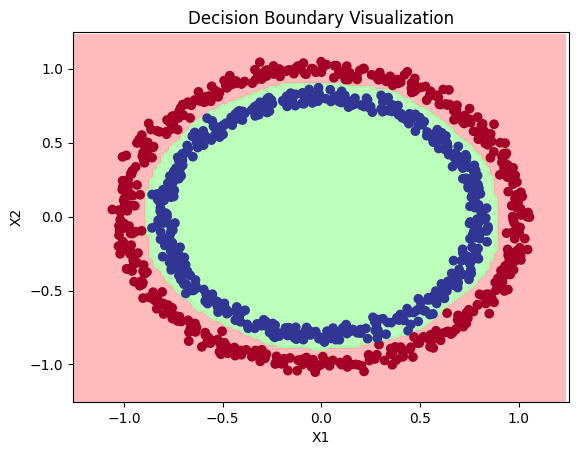

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a meshgrid to cover the data space
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2  # Add some padding for better visualization
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for each point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)
Z = Z.reshape(xx.shape)

# Create a custom colormap for the decision boundary
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])  # Light red and light green

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot the original data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

# Set plot title and labels
plt.title("Decision Boundary Visualization")
plt.xlabel("X1")
plt.ylabel("X2")

# Adjust plot limits for better visualization
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()